1. Import Libraries


In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

2. Basic Settings


In [143]:
batch_size = 20
learning_rate = .01
epochs = 50

3. Prepare the Data

In [144]:
train_loader = torch.utils.data.DataLoader(datasets.CIFAR10('../data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((.5,.5,.5),(.5,.5,.5))])), batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('../data', train = False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((.5,.5,.5),(.5,.5,.5))])), batch_size = batch_size, shuffle = False)

Files already downloaded and verified


4. Define the Module


In [145]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(3072,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000,6000),
            nn.ReLU(inplace=True),
            nn.Linear(6000, 10),
        )

    def forward(self, x):
        x = self.model(x)

        return x

5. Cuda, Optimizer, Loss Function

In [148]:
device = torch.device('cuda:0')
net = MLP().to(device)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss().to(device)

6. Start Training

In [149]:
for epoch in range(epochs):
  train_loss = 0
  train_acc = 0
  
  for data, target in train_loader:
    data = data.view(-1, 32*32*3)
    data, target = data.to(device), target.to(device)
    logits = net(data)
    loss = criteon(logits, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,pred = logits.max(1)
    num_correct = (pred==target).sum().item()
    acc = num_correct/data.shape[0]
    train_acc += acc
    
    train_loss += loss.data

  print('Train Epoch: {} Loss: {:.6f} Training Accuracy: {:.6f}'.format(epoch+1, train_loss/len(train_loader), train_acc/len(train_loader)))

Train Epoch: 1 Loss: 2.246491 Training Accuracy: 0.168020
Train Epoch: 2 Loss: 1.861921 Training Accuracy: 0.303680
Train Epoch: 3 Loss: 1.607362 Training Accuracy: 0.413580
Train Epoch: 4 Loss: 1.447467 Training Accuracy: 0.477280
Train Epoch: 5 Loss: 1.326011 Training Accuracy: 0.521420
Train Epoch: 6 Loss: 1.221435 Training Accuracy: 0.559900
Train Epoch: 7 Loss: 1.126308 Training Accuracy: 0.593960
Train Epoch: 8 Loss: 1.028003 Training Accuracy: 0.633300
Train Epoch: 9 Loss: 0.934547 Training Accuracy: 0.663760
Train Epoch: 10 Loss: 0.835291 Training Accuracy: 0.699140
Train Epoch: 11 Loss: 0.738954 Training Accuracy: 0.733500
Train Epoch: 12 Loss: 0.650593 Training Accuracy: 0.768420
Train Epoch: 13 Loss: 0.563912 Training Accuracy: 0.797780
Train Epoch: 14 Loss: 0.487000 Training Accuracy: 0.825580
Train Epoch: 15 Loss: 0.418204 Training Accuracy: 0.850980
Train Epoch: 16 Loss: 0.356919 Training Accuracy: 0.873760
Train Epoch: 17 Loss: 0.300846 Training Accuracy: 0.893800
Train 

7. Evaluate the Model

In [150]:
correct = 0
for data, target in test_loader:
    data = data.view(-1, 32*32*3)
    data, target = data.to(device), target.cuda()
    logits = net(data)

    pred = logits.argmax(dim=1)
    correct += pred.eq(target).float().sum().item()

total_num = len(test_loader.dataset)
acc = correct / total_num
print('test accuracy:', acc)

test accuracy: 0.5878


8. Make Predictions

In [151]:
def plot_image(img, prediction, label):

  fig = plt.figure()
  for i in range(6):
    plt.imshow(img[i])
    plt.title("Prediction = {} Label = {}".format(prediction[i].item(),label[i].item()))
    plt.show()

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


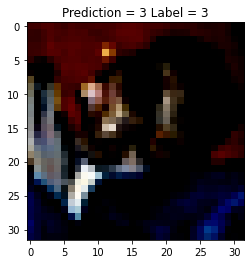

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


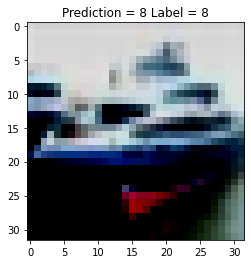

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


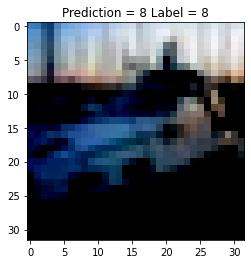

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


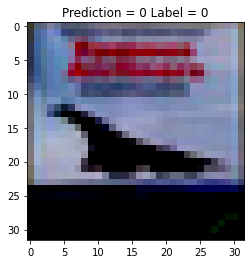

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


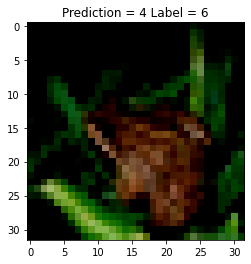

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


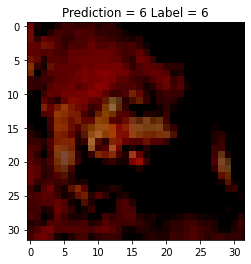

In [153]:
import numpy as np

x, y = next(iter(test_loader))


x = x.view(-1, 32*32*3)
x, y = x.to(device), y.cuda()
out = net(x)
pred = out.argmax(dim = 1)
x = x.detach().cpu().reshape((20,3,32,32)).permute(0,2,3,1).numpy()
plot_image(x, pred, y)
